<a href="https://colab.research.google.com/github/enznoor/AnomalyDetection/blob/main/FP_Libra_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#Load Data to memory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BasePath='drive/MyDrive/Term_05/FinalProject/Dataset/'
DF_LibraEgonet=pd.read_csv(BasePath+ 'Libra_ego_features.csv')
DF_Librarwalk = pd.read_csv(BasePath+'Libra_rwalk_features_L1_R2.csv')

In [ ]:
#df_node_features_ego=DF_LibraEgonet.sample(frac=0.1)


In [ ]:
df_node_features_ego=DF_LibraEgonet
N = len(df_node_features_ego)      # number of nodes
print('number of nodes:' , N)
total_alerts = np.sum(df_node_features_ego["nr_alerts"])  # number of (weighted) alerts
print('number of (weighted) alerts',total_alerts)
tpr_a_average = np.zeros(N)
total_reports = np.sum(df_node_features_ego["nr_reports"])  # number of (weighted) reports
print('number of (weighted) reports',total_reports)
tpr_r_average = np.zeros(N)

number of nodes: 385100
number of (weighted) alerts 711.0
number of (weighted) reports 17.0


In [ ]:
FeatureList=['f_degree_in','f_degree_out' , 'f_amount_in','f_amount_out','f_nr_trans_in','f_nr_trans_out','f_ego_nr_nodes',
             'f_ego_nr_edges','f_egored_degree_in','f_egored_degree_out','f_egored_amount_in','f_egored_amount_out','f_egored_nr_trans_in',
             'f_egored_nr_trans_out','f_egored_nr_nodes','f_egored_nr_edges']

In [ ]:
FeatureList=['f_degree_in','f_degree_out' ,
             'f_egored_amount_in','f_egored_amount_out']


In [ ]:
df_node_features_ego['NodeId'] = df_node_features_ego['NodeId'].astype(int)
df_node_features_ego['f_degree_in'] = df_node_features_ego['f_degree_in'].astype(int)
df_node_features_ego['f_degree_out'] = df_node_features_ego['f_degree_out'].astype(int)
df_node_features_ego['f_amount_in'] = df_node_features_ego['f_amount_in'].astype(int)
df_node_features_ego['f_amount_out'] = df_node_features_ego['f_amount_out'].astype(int)

df_node_features_ego['f_nr_trans_in'] = df_node_features_ego['f_nr_trans_in'].astype(int)
df_node_features_ego['f_nr_trans_out'] = df_node_features_ego['f_nr_trans_out'].astype(int)
df_node_features_ego['f_ego_nr_nodes'] = df_node_features_ego['f_ego_nr_nodes'].astype(int)
df_node_features_ego['f_ego_nr_edges'] = df_node_features_ego['f_ego_nr_edges'].astype(int)
df_node_features_ego['f_egored_degree_in'] = df_node_features_ego['f_egored_degree_in'].astype(int)
df_node_features_ego['f_egored_degree_out'] = df_node_features_ego['f_egored_degree_out'].astype(int)
df_node_features_ego['f_egored_amount_in'] = df_node_features_ego['f_egored_amount_in'].astype(int)
df_node_features_ego['f_egored_amount_out'] = df_node_features_ego['f_egored_amount_out'].astype(int)
df_node_features_ego['f_egored_nr_trans_in'] = df_node_features_ego['f_egored_nr_trans_in'].astype(int)
df_node_features_ego['f_egored_nr_trans_out'] = df_node_features_ego['f_egored_nr_trans_out'].astype(int)
df_node_features_ego['f_egored_nr_nodes'] = df_node_features_ego['f_egored_nr_nodes'].astype(int)
df_node_features_ego['f_egored_nr_edges'] = df_node_features_ego['f_egored_nr_edges'].astype(int)

df_node_features_ego['nr_alerts'] = df_node_features_ego['nr_alerts'].astype(int)
df_node_features_ego['nr_reports'] = df_node_features_ego['nr_reports'].astype(int)


In [ ]:
df_node_features_ego.head()

,NodeId,f_degree_in,f_degree_out,f_amount_in,f_amount_out,f_nr_trans_in,f_nr_trans_out,f_ego_nr_nodes,f_ego_nr_edges,f_egored_degree_in,f_egored_degree_out,f_egored_amount_in,f_egored_amount_out,f_egored_nr_trans_in,f_egored_nr_trans_out,f_egored_nr_nodes,f_egored_nr_edges,nr_alerts,nr_reports
0,0,0,4,0,41160,0,8,5,4,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,646,0,1,2,1,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,60,0,2,2,1,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,1884,0,2,2,1,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,111,0,1,2,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_node_features_ego.insert(1, "label", 0)

In [ ]:
df_node_features_ego
#df_node_features_ego["label"] = np.where(df_node_features_ego["nr_reports"] > 0, 1, 0)
df_node_features_ego["label"] = np.where(df_node_features_ego["nr_alerts"] > 0, 1, 0)

In [ ]:
np.where(df_node_features_ego["label"] == 1)

In [ ]:
df_node_features_ego

In [ ]:
X=df_node_features_ego[FeatureList]
y=df_node_features_ego['label']

In [ ]:
#weights=df_node_features_ego['nr_alerts']

In [ ]:
# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
#    X, y, weights, test_size=0.2, random_state=42
#)

#With Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

In [ ]:
# Convert data to PyTorch tensors

X_train_tensor = torch.tensor(X_train.values)
y_train_tensor = torch.tensor(y_train.values)
X_test_tensor = torch.tensor(X_test.values)
y_test_tensor = torch.tensor(y_test.values)

In [ ]:
# Calculate class weights for the WeightedRandomSampler
class_counts = torch.bincount(y_train_tensor)
class_weights = 1.0 / class_counts.float()

In [ ]:
# Create a WeightedRandomSampler
weights = class_weights[y_train_tensor]
sampler = WeightedRandomSampler(weights, len(weights))

In [ ]:
# Define logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out


In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = LogisticRegressionModel(input_size)
criterion = nn.BCELoss()
#optimizer = optim.SGD(model.parameters(), lr=1e-3 ,  weight_decay=0.05 , momentum=0.001)
optimizer = optim.SGD(model.parameters(), lr=1e-3 , momentum=0.002 , weight_decay=0.001)


In [ ]:
# Create DataLoader with WeightedRandomSampler
batch_size = 128
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

# Training the logistic regression model
num_epochs = 100

In [ ]:
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        #print(inputs)
        outputs = model(inputs.to(torch.float32))
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 6.5134
Epoch [2/100], Loss: 3.0616
Epoch [3/100], Loss: 2.0593
Epoch [4/100], Loss: 3.0835
Epoch [5/100], Loss: 2.9709
Epoch [6/100], Loss: 5.6175
Epoch [7/100], Loss: 3.8756
Epoch [8/100], Loss: 5.6447
Epoch [9/100], Loss: 3.0823
Epoch [10/100], Loss: 5.6900
Epoch [11/100], Loss: 3.8802
Epoch [12/100], Loss: 2.9777
Epoch [13/100], Loss: 2.9343
Epoch [14/100], Loss: 2.0228
Epoch [15/100], Loss: 4.7330
Epoch [16/100], Loss: 3.8535
Epoch [17/100], Loss: 6.5449
Epoch [18/100], Loss: 4.8216
Epoch [19/100], Loss: 3.8926
Epoch [20/100], Loss: 2.2822
Epoch [21/100], Loss: 3.9048
Epoch [22/100], Loss: 5.7015
Epoch [23/100], Loss: 2.2156
Epoch [24/100], Loss: 2.9558
Epoch [25/100], Loss: 1.1271
Epoch [26/100], Loss: 3.0381
Epoch [27/100], Loss: 4.7002
Epoch [28/100], Loss: 1.2245
Epoch [29/100], Loss: 4.7611
Epoch [30/100], Loss: 1.2165
Epoch [31/100], Loss: 6.5636
Epoch [32/100], Loss: 7.3888
Epoch [33/100], Loss: 4.7955
Epoch [34/100], Loss: 3.8355
Epoch [35/100], Loss: 4

In [ ]:
XtestData=X_test_tensor.to(torch.float32)

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(XtestData)
    predicted_labels = (test_outputs >= 0.5).float()
    predicted_labels=np.squeeze(predicted_labels)
    accuracy = torch.sum(predicted_labels == y_test_tensor.float()).item() / y_test_tensor.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8934


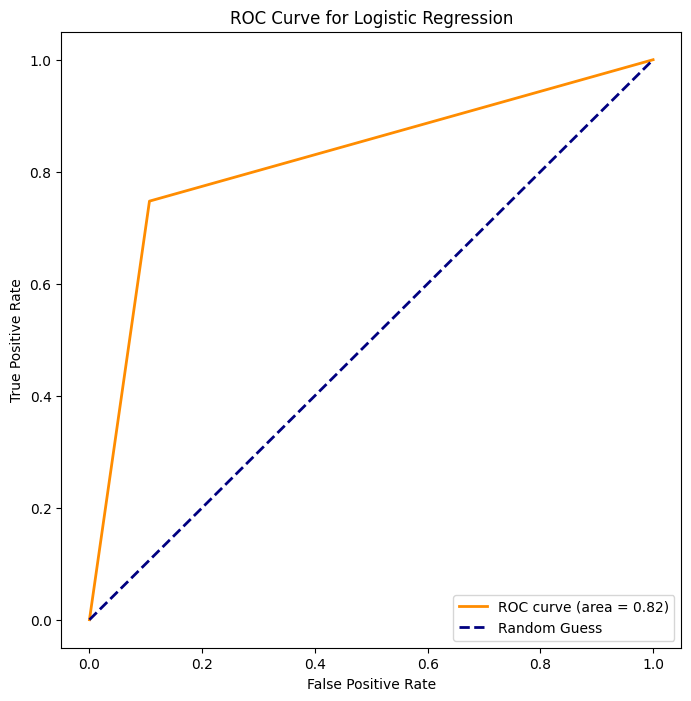

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_tensor, predicted_labels)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Make predictions on the test set
#y_pred = model.predict(X_test_tensor)

# Evaluate the model
print(classification_report(y_test_tensor, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     76921
           1       0.01      0.75      0.02        99

    accuracy                           0.89     77020
   macro avg       0.50      0.82      0.48     77020
weighted avg       1.00      0.89      0.94     77020



#Unbalance Class - under sampleing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='auto')
under_sampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     76921
           1       0.01      1.00      0.02        99

    accuracy                           0.86     77020
   macro avg       0.50      0.93      0.47     77020
weighted avg       1.00      0.86      0.92     77020



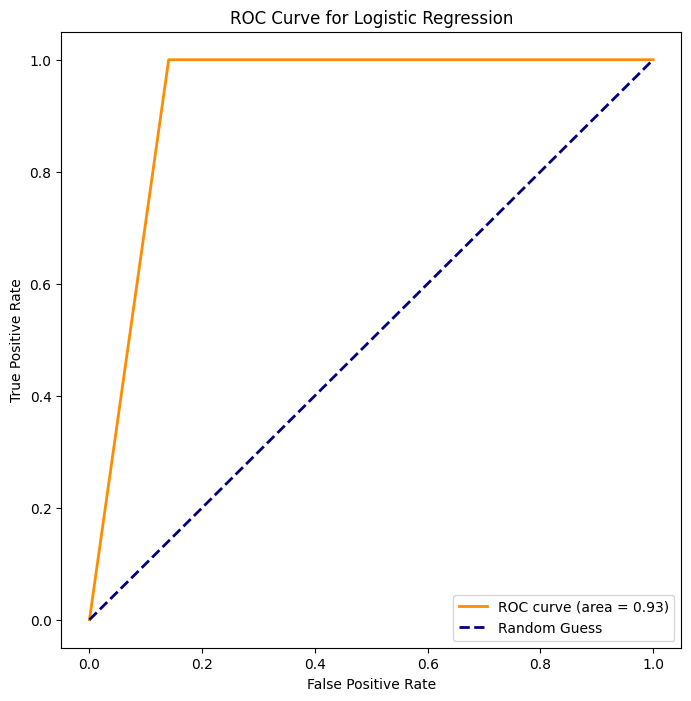

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Change FeatureInfo

In [ ]:
FeatureList=['f_degree_in','f_degree_out' ,
             'f_egored_amount_in','f_egored_amount_out']

In [ ]:
X=df_node_features_ego[FeatureList]
y=df_node_features_ego['label']

In [ ]:
# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='auto')
under_sampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62     76921
           1       0.00      1.00      0.00        99

    accuracy                           0.45     77020
   macro avg       0.50      0.72      0.31     77020
weighted avg       1.00      0.45      0.62     77020



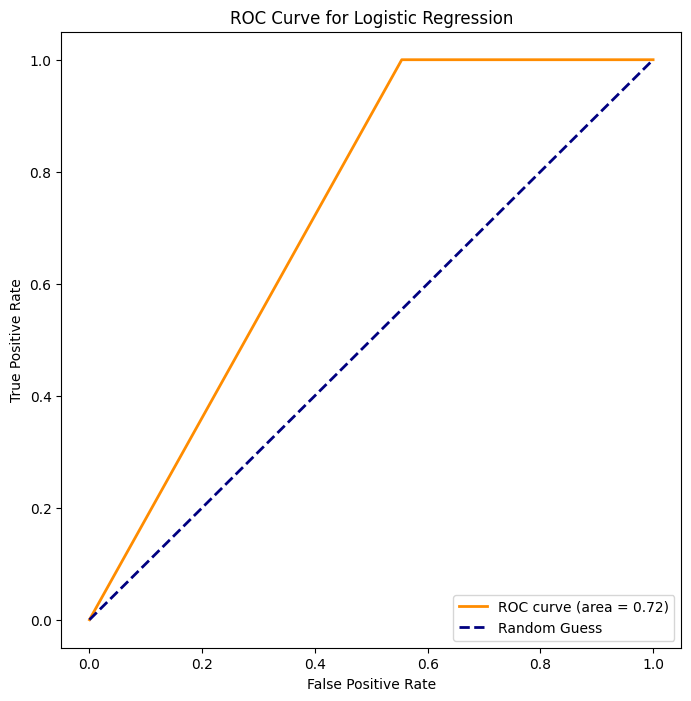

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Unbalance With weighted

In [ ]:
FeatureList=['f_degree_in','f_degree_out' , 'f_amount_in','f_amount_out','f_nr_trans_in','f_nr_trans_out','f_ego_nr_nodes',
             'f_ego_nr_edges','f_egored_degree_in','f_egored_degree_out','f_egored_amount_in','f_egored_amount_out','f_egored_nr_trans_in',
             'f_egored_nr_trans_out','f_egored_nr_nodes','f_egored_nr_edges']

In [ ]:
X=df_node_features_ego[FeatureList]
y=df_node_features_ego['label']

In [ ]:
# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [ ]:
#smote = SMOTE(sampling_strategy='auto')
#under_sampler = RandomUnderSampler(sampling_strategy='auto')
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
#X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

model = LogisticRegression(class_weight='balanced')
# Train a logistic regression model on the resampled data
#model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62     76921
           1       0.00      1.00      0.00        99

    accuracy                           0.45     77020
   macro avg       0.50      0.72      0.31     77020
weighted avg       1.00      0.45      0.62     77020

